# Análise de Dados para Concessão de Crédito

## Explicação do Conjunto de Dados de Classificação de Crédito

Este conjunto de dados oferece uma visão abrangente das solicitações de empréstimo, juntamente com atributos financeiros e demográficos chave que contribuem para a avaliação da aprovação ou rejeição do empréstimo. Os dados incluem tanto características específicas do solicitante quanto características específicas do empréstimo, que podem ajudar a modelar a probabilidade de aprovação do empréstimo. Abaixo está um resumo rápido::

- **🔢 Número de Registros**: 45.000
- **🧩 Total de Colunas**: 14 (Entre Categoricas e Continuas)

#### 📝 Descrição das Features:

| Coluna                               | Descrição                                                 | Tipo de Dados    |
|--------------------------------------|-------------------------------------------------------------|--------------|
| 👤 **Idade**                     | Idade do Solicitante                                             | Float        |
| 🚻 **Sexo**                  | Sexo do Solicitante                                          | Categorical  |
| 🎓 **Grau_Escolaridade**               | Grau de Escolaridade                      | Categorica  |
| 💰 **Salario**                  | Salário anual do Solicitante                       | Float        |
| 📅 **Tempo_Emprego**                 | Anos de experiência profissional                              | Integer      |
| 🏠 **Moradia**          | Situação de Moradia           | Categorica  |
| 🏦 **Valor_Emprestimo**                      | Empréstimo Requisitado                                     | Float        |
| 🎯 **Proposito**                    | Propósito do Empréstimo    | Categorica  |
| 📈 **Taxa**                  | Taxa praticada para o empréstimo                        | Float        |
| 📊 **Comprometimento_Renda**            | Loan amount as a percentage of annual income                | Float        |
| 💳 **Score_Credito**                   | Score de Credito do Solicitante                                    | Integer      |
| ❗ **Inadimplencias_Anteriores**  | Indicador de Inadimplencias Anteriores (Sim/Não)                | Categorica  |
| ✅ **Credito_Concedido**                    | Resultado da Concessao de Credito (1 = aprovada, 0 = reprovada)            | Integer       |



## 1. Importação e Configuração

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.utils import resample

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

## 2. Análise Exploratória de Dados (EDA)

- Objetivo: Entender a estrutura de dados, identificar padrões e detectar anomalias.

1. Carregamento dos dados
2. Visualização da distribuição de variáveis
3. Identificação de outliers
4. Análise de correlação entre variáveis
5. Resumo estatístico de variáveis
6. Visualização de dados categóricos e numéricos


In [3]:
data = pd.read_csv('data/dados.csv', encoding='ISO-8859-1', sep=";")
data

,Idade,Sexo,Grau_Escolaridade,Salario,Tempo_Emprego,Moradia,Valor_Emprestimo,Proposito,Taxa,Comprometimento_Renda,Score_Credito,Inadimplencias_Anteriores,Credito_Concedido
0,22.0,feminino,Mestrado,71948.0,0,ALUGUEL,35000.0,PESSOAL,16.02,0.49,561,No,1
1,21.0,feminino,Segundo Grau,12282.0,0,PRÓPRIA,1000.0,EDUCACIONAL,11.14,0.08,504,Yes,0
2,25.0,feminino,Segundo Grau,12438.0,3,HIPOTECA,5500.0,MÉDICO,12.87,0.44,635,No,1
3,23.0,feminino,Bacharel,79753.0,0,ALUGUEL,35000.0,MÉDICO,15.23,0.44,675,No,1
4,24.0,masculino,Mestrado,66135.0,1,ALUGUEL,35000.0,MÉDICO,14.27,0.53,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,masculino,Tecnólogo,47971.0,6,ALUGUEL,15000.0,MÉDICO,15.66,0.31,645,No,1
44996,37.0,feminino,Tecnólogo,65800.0,17,ALUGUEL,9000.0,REFORMA,14.07,0.14,621,No,1
44997,33.0,masculino,Tecnólogo,56942.0,7,ALUGUEL,2771.0,QUITAÇÃO,10.02,0.05,668,No,1
44998,29.0,masculino,Bacharel,33164.0,4,ALUGUEL,12000.0,EDUCACIONAL,13.23,0.36,604,No,1


### 2.1 Exploração Inicial

In [4]:
data.describe()

,Idade,Salario,Tempo_Emprego,Valor_Emprestimo,Taxa,Comprometimento_Renda,Score_Credito,Credito_Concedido
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,850.000000,1.000000


Outliers detectados em :

- Idade
- Tempo de Emprego

In [8]:
data.isnull().sum()

Idade                        0
Sexo                         0
Grau_Escolaridade            0
Salario                      0
Tempo_Emprego                0
Moradia                      0
Valor_Emprestimo             0
Proposito                    0
Taxa                         0
Comprometimento_Renda        0
Score_Credito                0
Inadimplencias_Anteriores    0
Credito_Concedido            0
dtype: int64

Não há valores nulos

In [12]:
data.duplicated().sum()

np.int64(0)

Não há valores duplicados

In [16]:
data.nunique()

Idade                           60
Sexo                             2
Grau_Escolaridade                5
Salario                      33989
Tempo_Emprego                   63
Moradia                          4
Valor_Emprestimo              4483
Proposito                        6
Taxa                          1302
Comprometimento_Renda           64
Score_Credito                  340
Inadimplencias_Anteriores        2
Credito_Concedido                2
dtype: int64

### 2.2 Análises Específicas e de Distribuições

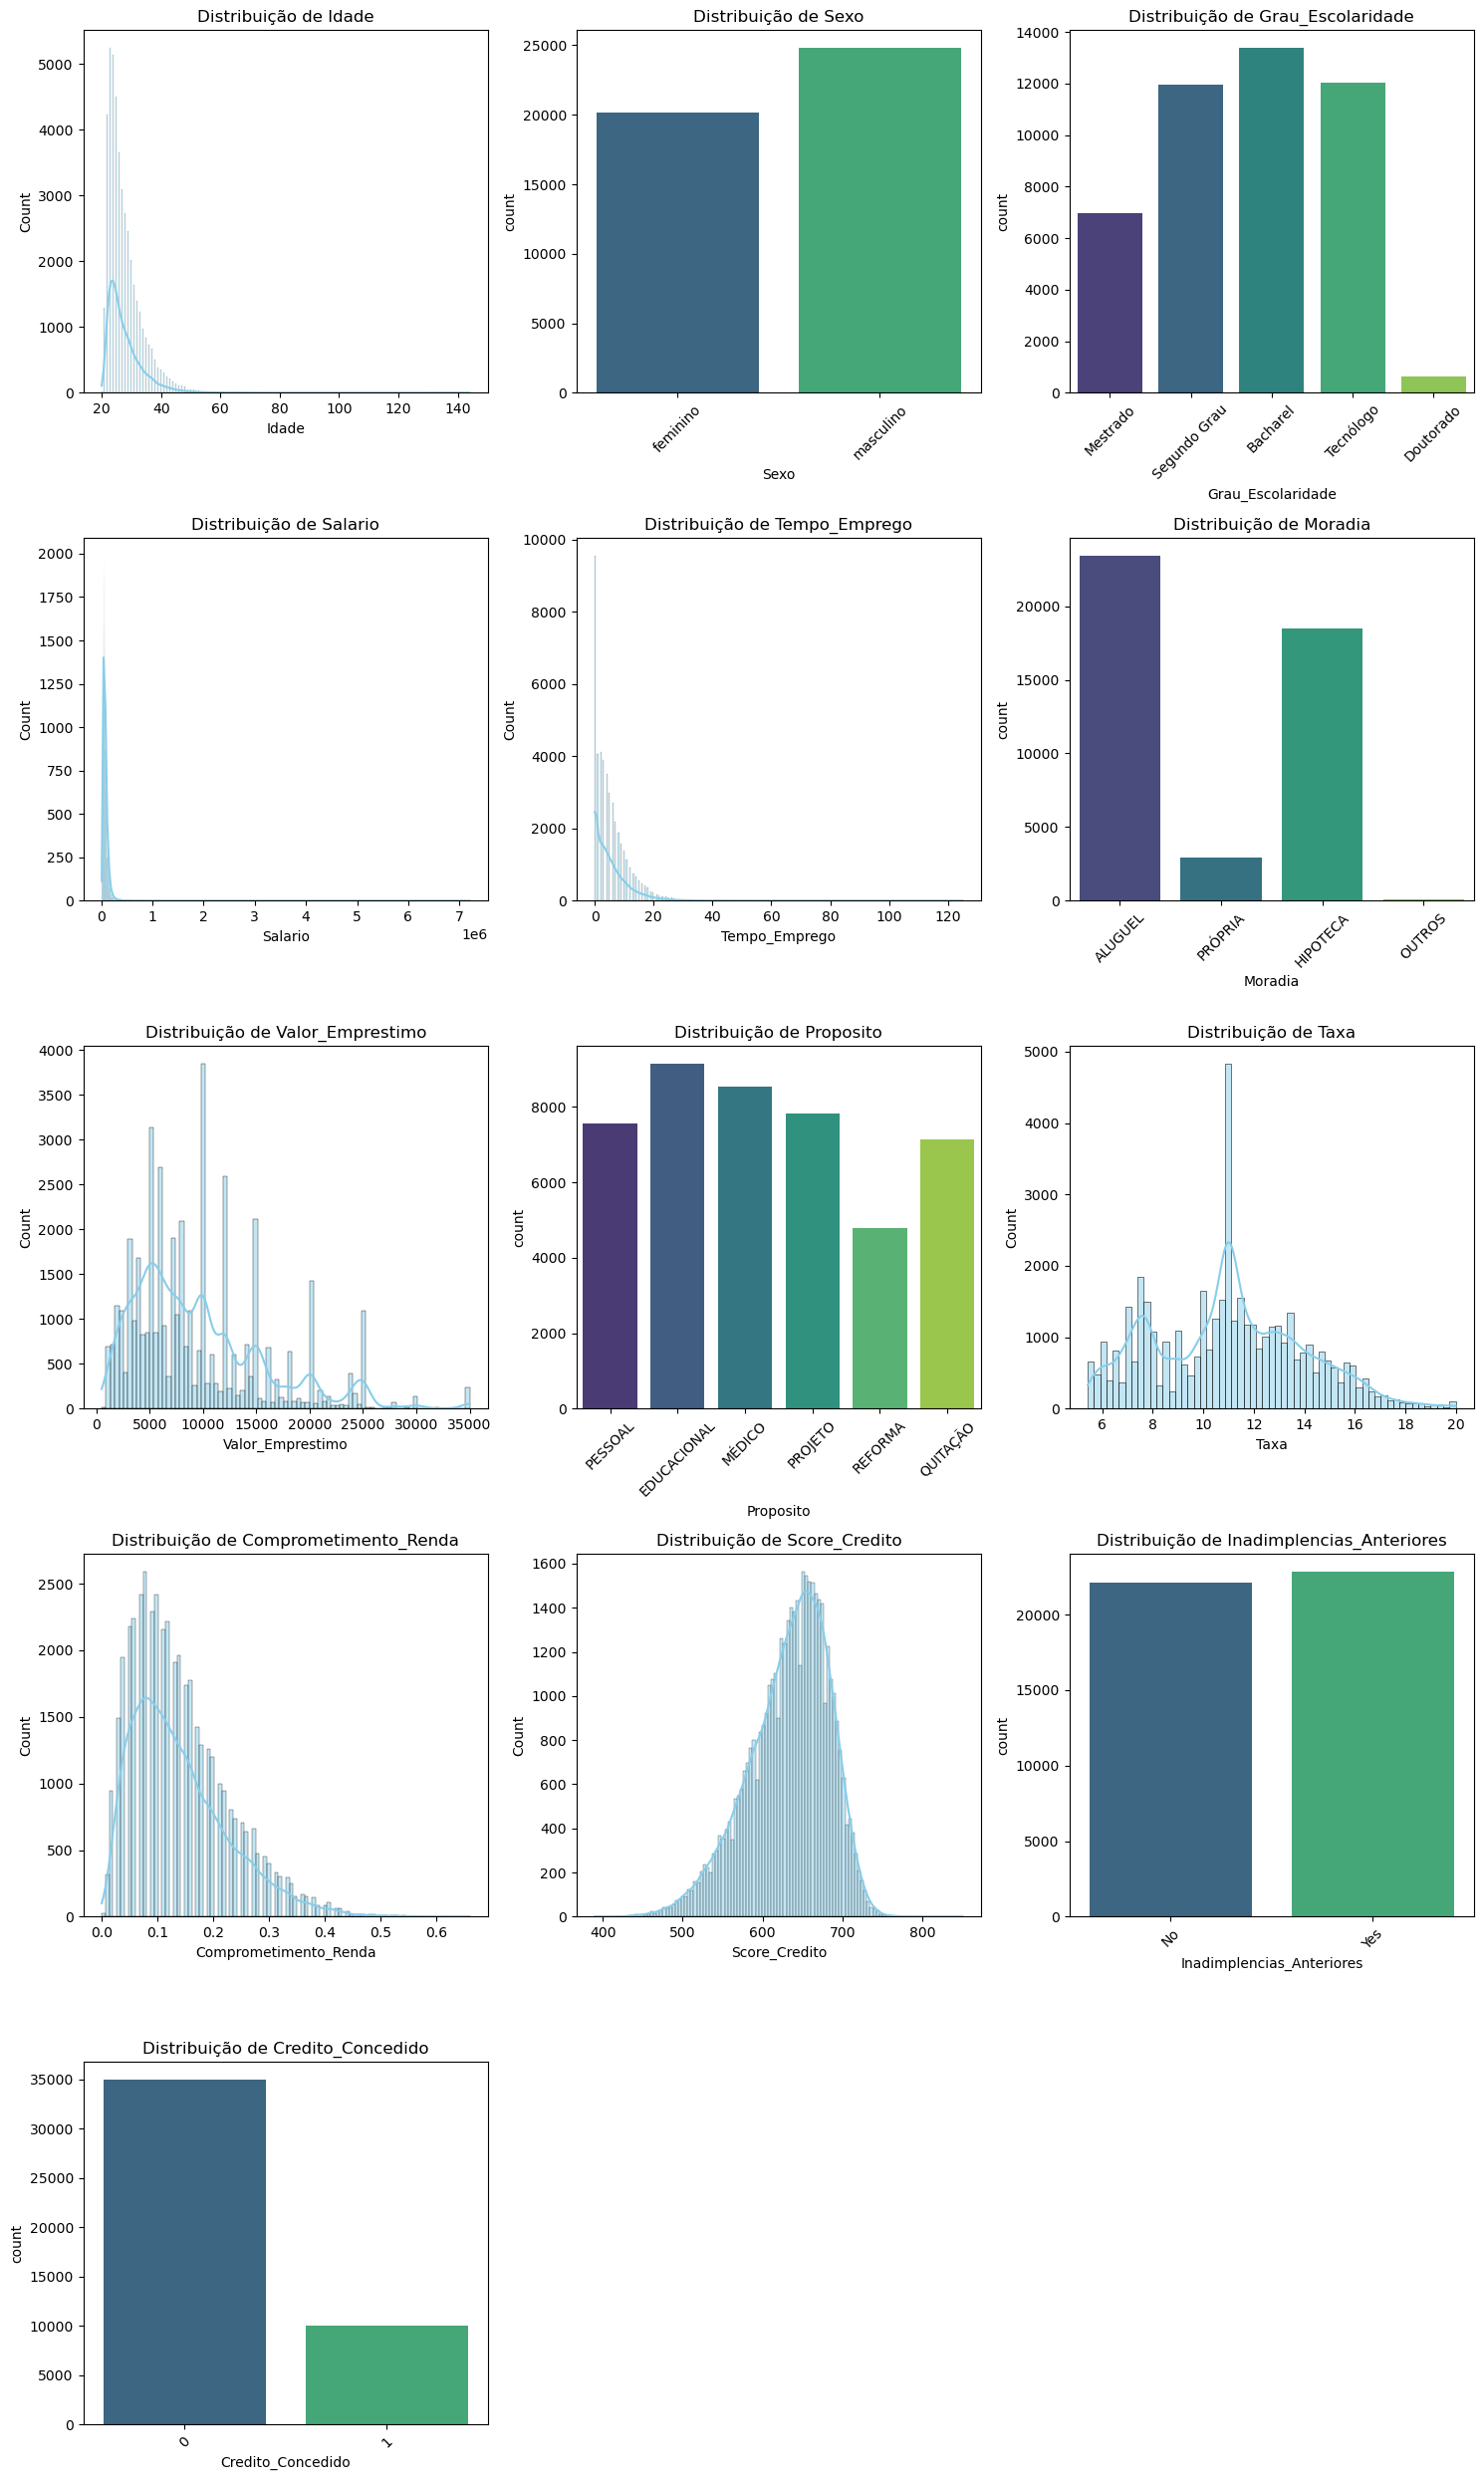

In [ ]:
num_cols = len(data.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # organiza em no máximo 3 colunas por linha

plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(data.columns, 1):
    plt.subplot(num_rows, 3, i)  # organiza os gráficos em uma grid 3xN
    if data[column].dtype == 'object' or data[column].nunique() < 10:  # se for categórica ou tem poucos valores únicos
        sns.countplot(x=data[column], palette='viridis')  # gráfico de barras
        plt.title(f'Distribuição de {column}')
        plt.xticks(rotation=45)  
    else:
        sns.histplot(data[column], kde=True, color='skyblue')  # histograma com KDE para quantitativas
        plt.title(f'Distribuição de {column}')

plt.tight_layout()
plt.show()

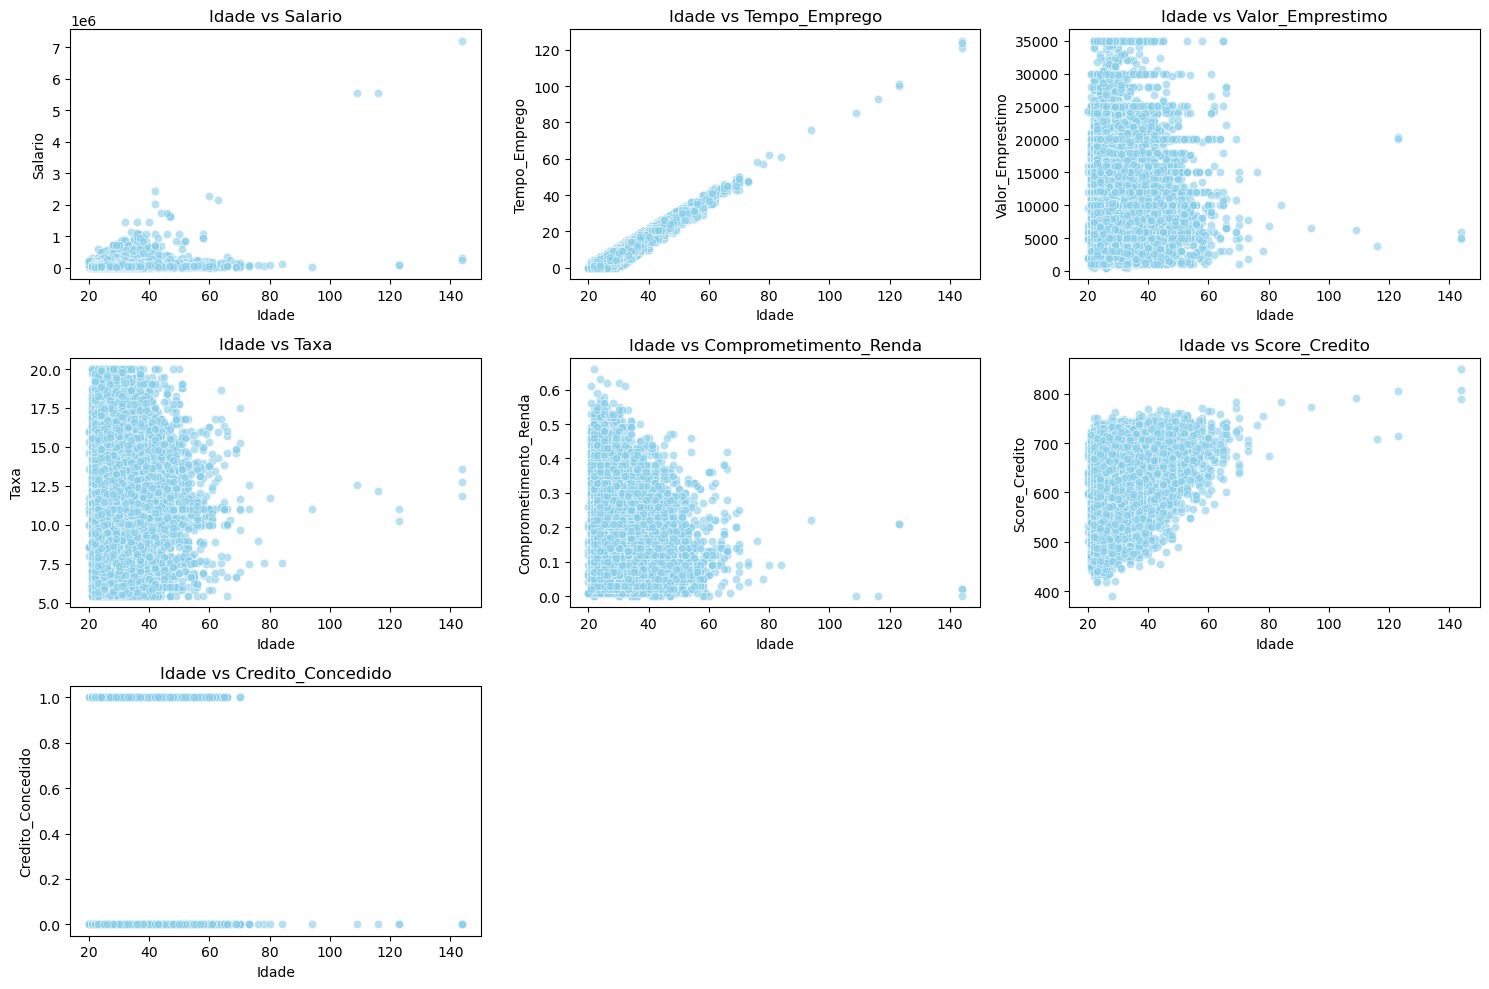

In [18]:
num_vars = data.select_dtypes(include=[np.number]).columns  # seleciona apenas variáveis numéricas
num_pairs = len(num_vars)

if num_pairs > 1:
    plt.figure(figsize=(15, 5 * (num_pairs // 3)))
    for i, col in enumerate(num_vars[1:], 1):  # pula a primeira para usar como base
        plt.subplot((num_pairs - 1) // 3 + 1, 3, i)
        sns.scatterplot(x=data[num_vars[0]], y=data[col], alpha=0.6, color='skyblue')
        plt.title(f'{num_vars[0]} vs {col}')
        plt.xlabel(num_vars[0])
        plt.ylabel(col)

    plt.tight_layout()
    plt.show()

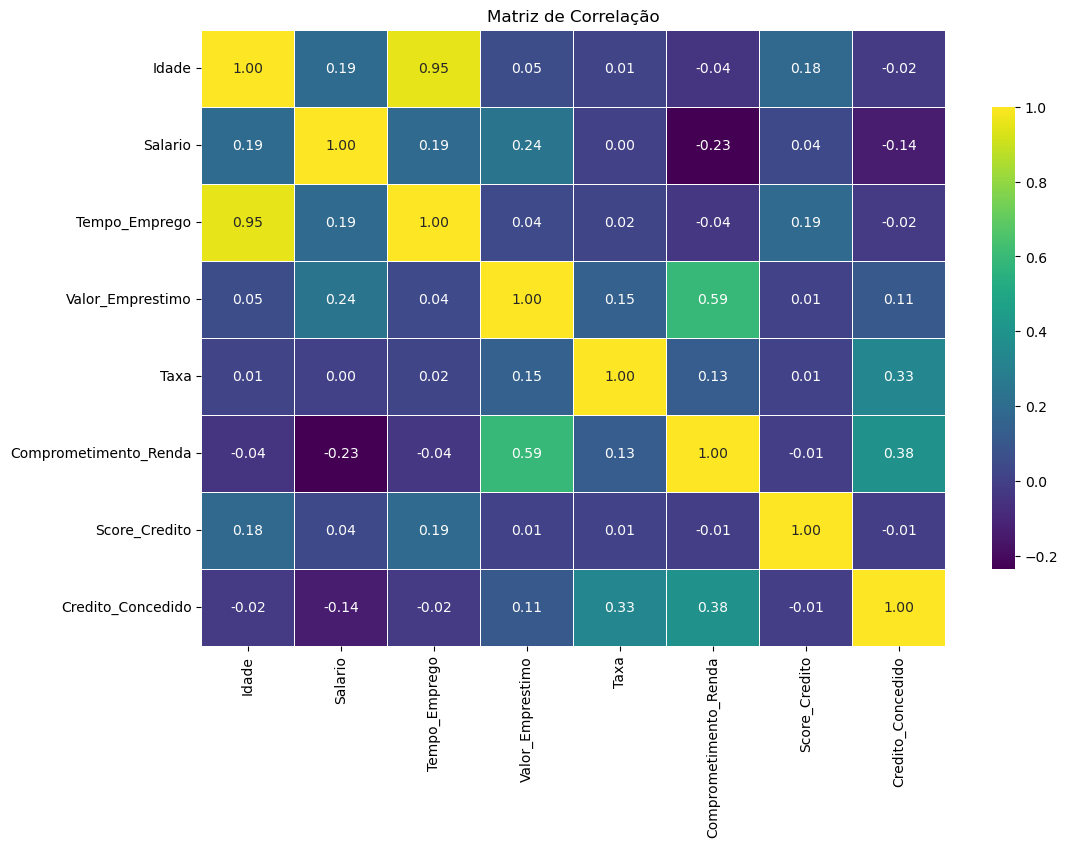

In [22]:
plt.figure(figsize=(12, 8))

corr = data.corr(numeric_only=True)
sns.heatmap(corr, cmap='viridis', annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.75})
plt.title('Matriz de Correlação')
plt.show()

#### Interpretações:

1. **Desequilíbrio de Classes**:
   - **Crédito Concedido**: Se a variável "Crédito Concedido" tiver uma grande disparidade entre as classes (por exemplo, muito mais registros de "Crédito Concedido" do que "Crédito Não Concedido"), isso pode indicar um desequilíbrio de classes. Esse desequilíbrio pode afetar a performance do modelo de machine learning, fazendo com que ele se incline mais para a classe majoritária. É importante considerar técnicas de balanceamento de classes, como SMOTE ou amostragem balanceada.

2. **Outliers**:
   - **Idade**: A distribuição da variável "Idade" pode apresentar alguns outliers (valores muito distantes da média), como pessoas extremamente jovens ou mais velhas, que podem influenciar nos resultados. Identificar e tratar esses outliers é crucial, pois podem afetar a modelagem, especialmente se o modelo for sensível a valores extremos.
   - **Tempo de Emprego**: Da mesma forma, "Tempo de Emprego" pode apresentar outliers, como pessoas com muitos anos de experiência ou registros com poucos meses. A presença de outliers pode sugerir a necessidade de aplicar tratamentos para normalizar ou limitar esses valores, garantindo que eles não distorçam a análise.

3. **Relações com as Variáveis e a Idade**:
   - A **Idade** pode apresentar correlações interessantes com outras variáveis. Por exemplo, pode haver uma relação direta com a experiência profissional ("Tempo de Emprego"), já que pessoas mais velhas tendem a ter mais anos de experiência. No entanto, é importante verificar se a distribuição da idade é balanceada e se os grupos de idade possuem características bem definidas que impactam diretamente nas outras variáveis.

4. **Relações Específicas entre Variáveis**:
   - **Idade e Tempo de Emprego**: Existe uma relação alta entre a idade e o tempo de emprego. Isso é esperado, pois pessoas mais velhas tendem a ter mais anos de experiência no mercado de trabalho. Essa correlação deve ser considerada ao analisar a experiência e a qualificação dos indivíduos.
   - **Salário e Comprometimento de Renda**: A relação inversa entre "Salário" e "Comprometimento de Renda" pode sugerir que, à medida que o salário aumenta, o comprometimento com a renda (percentual da renda destinado ao pagamento de dívidas, por exemplo) tende a diminuir. Isso pode indicar que pessoas com salários mais elevados têm mais flexibilidade financeira.
   - **Salário e Crédito Concedido**: A relação entre "Salário" e "Crédito Concedido" pode ser direta, onde pessoas com salários mais altos tendem a ter maior crédito concedido, já que bancos ou instituições financeiras consideram o poder aquisitivo para autorizar empréstimos.
   - **Valor do Empréstimo e Comprometimento de Renda**: Uma relação positiva entre "Valor do Empréstimo" e "Comprometimento de Renda" pode indicar que, quanto maior o empréstimo, maior o impacto no comprometimento da renda do indivíduo. Isso é natural, pois empréstimos maiores exigem parcelas mais altas, comprometendo uma parte significativa da renda.
   - **Taxa e Crédito Concedido**: A "Taxa" (talvez taxa de juros ou alguma outra métrica) pode ter uma relação com o "Crédito Concedido", onde taxas mais baixas podem estar associadas ao aumento de crédito concedido. Isso pode ocorrer porque, com taxas de juros mais baixas, o crédito torna-se mais acessível e menos oneroso para os indivíduos.

---

## 3. Pré-processamento de Dados

**Objetivo:** Preparar os dados para o modelo de aprendizado de máquina.

1. Tratamento de outliers
2. Codificação de variáveis categóricas
3. Normalização/Escala das variáveis numéricas
4. Divisão dos dados em treino e teste